In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')

In [80]:
pred1=pd.read_csv('Files/BiLSTM/additionalX_BZ.csv', index_col=0)
pred2=pd.read_csv('Files/BiLSTM/additionalX_BZ_vecO.csv', index_col=0)
pred3=pd.read_csv('Files/Backbone_SP.csv', index_col=0)

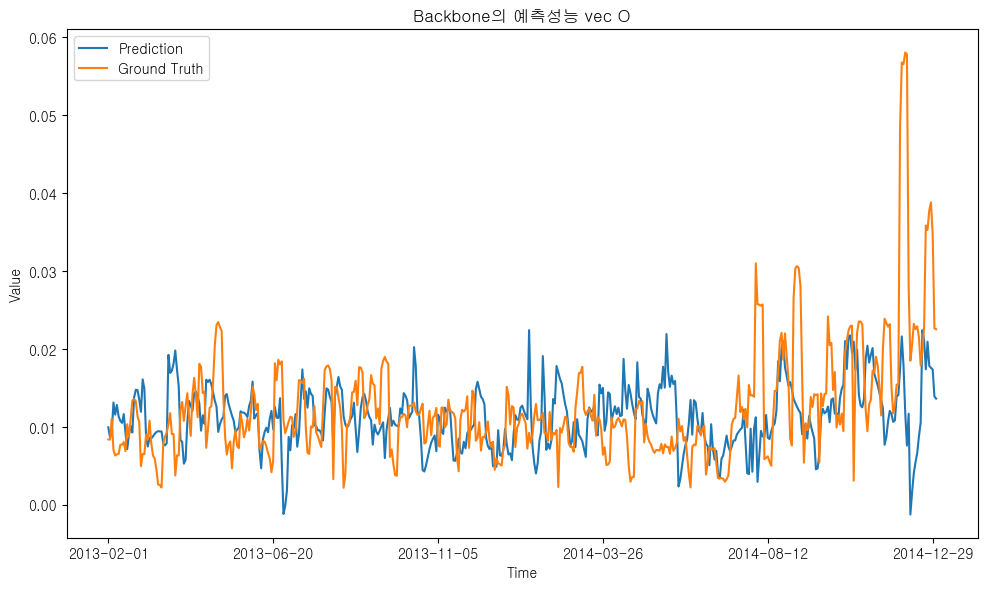

In [71]:
plt.figure(figsize=(10,6))
plt.plot( pred3['Predictions'], label='Prediction')
plt.plot( pred3['Ground Truths'],label='Ground Truth')
plt.title('Backbone의 예측성능 vec O')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred3.index[0:-1:96])
plt.tight_layout()
plt.show()

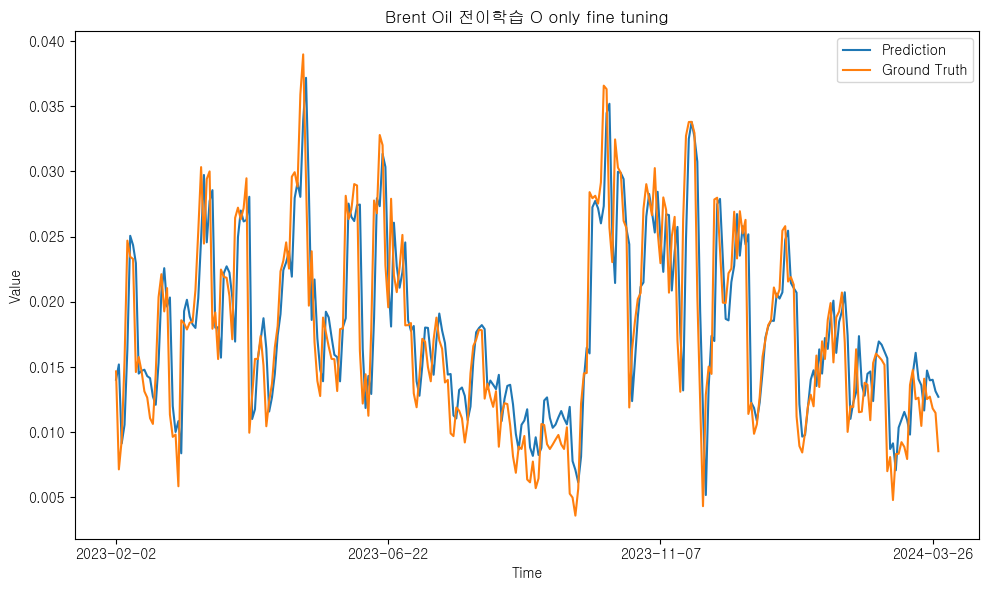

In [82]:
plt.figure(figsize=(10,6))
plt.plot( pred1['Predictions'], label='Prediction')
plt.plot( pred1['Ground Truths'],label='Ground Truth')
plt.title('Brent Oil 전이학습 O only fine tuning')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred1.index[0:-1:96])
plt.tight_layout()
plt.show()